# NLP Analysis  of Tweets on Covid-19

### Introduction

Over the years, Twitter has grown to become an important medium of communication. Individuals are involved in reporting news even without noticing it. News from tweets can be even faster and more accurate than a traditional press. Therefore, many agencies are eager to monitor what's happening on tweets. However, this comes with its own complications. 
Distinguishing whether a person’s words are announcing real big news or just a type of word making jokes is a challenge. In this project, as an illustration, I'm going to analyze the unstructured data from tweets to understand what people conserns for covid-19. The dataset was from [Kaggle](https://www.kaggle.com/carlsonhoo/coronavirus-tweets). There're data for quite a few days, but for demosntration, only the latest available data which is on March 2,are analyzed. 

In this report, Some exploratory data analysis for the fundamental understanding of the dataset was applied to the training dataset. It includes text pre-processing and feature selections to find tokens that could help to create an accurate model later. Then the data was reconstructed as a new dataset for further applications. 

### Installations and modules

In [50]:
!pip install nltk
!pip install wordcloud
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from collections import defaultdict, Counter
import nltk
from nltk import pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

### Data Exploration

In [20]:
with open("./data/coronavirus_tweets_20200302.txt") as file:
        content = [x.strip('\n') for x in file.readlines()]
#         print content   

In [57]:
variables = []
data = []
for ii,cont in enumerate(content):
    try:  # ignore data with different structure
        if ii%2==0:
            row = []
            for jj,cell in enumerate(cont.split(',"')):
                if jj<200: # take only the first 200 columns
                    temp = cell.split('":')
                    row.append(temp[1]) # values
                    if ii==0:
                        variables.append(temp[0].replace('{"',"")) # variable name
            data.append(row)
    except:
        pass
            
# print(variables)

In [76]:
train = pd.DataFrame(data,columns=variables)

In [47]:
print('Number of Records in Train Dataset', len(train))

Number of Records in Train Dataset 56357


In [77]:
train

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,indices,symbols,media,id_str,indices,additional_media_info,media_url,media_url_https,url,display_url
0,"""Mon Mar 02 05:57:09 +0000 2020""",1234357055701626881,"""1234357055701626881""","""RT @coffeedogshist: A comparative look at the...","""\u003ca href=\""https:\/\/mobile.twitter.com\""...",false,null,null,null,null,...,"[3,18]}]",[],"[{""id","""1234314145304059906""","[91,114]","{""monetizable","""http:\/\/pbs.twimg.com\/ext_tw_video_thumb\/1...","""https:\/\/pbs.twimg.com\/ext_tw_video_thumb\/...","""https:\/\/t.co\/dunwXhDPwR""","""pic.twitter.com\/dunwXhDPwR"""
1,"""Mon Mar 02 05:57:09 +0000 2020""",1234357055768580096,"""1234357055768580096""","""RT @afrkml: Ironi ya. Harga masker naik hingg...","""\u003ca href=\""https:\/\/mobile.twitter.com\""...",false,null,null,null,null,...,"""video""","{""aspect_ratio",32032,"[{""content_type","""https:\/\/video.twimg.com\/amplify_video\/123...","""video\/mp4""","""https:\/\/video.twimg.com\/amplify_video\/123...","""video\/mp4""","""https:\/\/video.twimg.com\/amplify_video\/123...","""video\/mp4"""
2,"""Mon Mar 02 05:57:10 +0000 2020""",1234357056762785793,"""1234357056762785793""","""RT @lhmandetta: O Minist\u00e9rio da Sa\u00fa...","""\u003ca href=\""https:\/\/mobile.twitter.com\""...",false,null,null,null,null,...,None,None,None,None,None,None,None,None,None,None
3,"""Mon Mar 02 05:57:10 +0000 2020""",1234357057027035136,"""1234357057027035136""","""@nytimes Check out: https:\/\/t.co\/X2M7YSliD...","[9,140]","""\u003ca href=\""https:\/\/mobile.twitter.com\""...",true,1234353067862171648,"""1234353067862171648""",807095,...,None,None,None,None,None,None,None,None,None,None
4,"""Mon Mar 02 05:57:10 +0000 2020""",1234357057077293056,"""1234357057077293056""","""@VP no one believes you""","""\u003ca href=\""http:\/\/twitter.com\/download...",false,null,null,818910970567344128,"""818910970567344128""",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56304,"""Mon Mar 02 07:15:41 +0000 2020""",1234376817945063425,"""1234376817945063425""","""RT @DavidShuster: Spoke today to several infe...","""\u003ca href=\""https:\/\/mobile.twitter.com\""...",false,null,null,null,null,...,None,None,None,None,None,None,None,None,None,None
56305,"""Mon Mar 02 07:15:41 +0000 2020""",1234376817999478786,"""1234376817999478786""","""RT @evertonfc2: I wasn't worried about #coron...","""\u003ca href=\""http:\/\/twitter.com\/download...",false,null,null,null,null,...,"[{""screen_name","""Matt Hancock""",19825835,"""19825835""","[50,62]}]",[]},false,false,false,"""low"""
56306,"""Mon Mar 02 07:15:41 +0000 2020""",1234376818313977856,"""1234376818313977856""","""RT @ChinaDaily: Having recovered from #COVID1...","""\u003ca href=\""https:\/\/mobile.twitter.com\""...",false,null,null,null,null,...,"[117,140]}]",[],[]},false,false,false,"""low""","""en""}",false,0
56307,"""Mon Mar 02 07:15:41 +0000 2020""",1234376818464976896,"""1234376818464976896""","""RT @afrkml: Ironi ya. Harga masker naik hingg...","""\u003ca href=\""http:\/\/twitter.com\/download...",false,null,null,null,null,...,"{""aspect_ratio",32032,"[{""content_type","""https:\/\/video.twimg.com\/amplify_video\/123...","""video\/mp4""","""https:\/\/video.twimg.com\/amplify_video\/123...","""video\/mp4""","""https:\/\/video.twimg.com\/amplify_video\/123...","""video\/mp4""","""https:\/\/video.twimg.com\/amplify_video\/123..."


After observing the data, many columns do not contain menaingful contents. For hte proposal here, just take the first 3 indepedent columns for EDA. 


In [87]:
# train_part = train[["created_at","id","text"]]

train_part = train.iloc[:,[0,1,3]]

In [63]:
train.isna().sum()

created_at        0
created_at        0
created_at     1656
id                0
id                0
id            18707
text              0
text              0
dtype: int64

In [88]:
train_part

,created_at,id,text
0,"""Mon Mar 02 05:57:09 +0000 2020""",1234357055701626881,"""RT @coffeedogshist: A comparative look at the..."
1,"""Mon Mar 02 05:57:09 +0000 2020""",1234357055768580096,"""RT @afrkml: Ironi ya. Harga masker naik hingg..."
2,"""Mon Mar 02 05:57:10 +0000 2020""",1234357056762785793,"""RT @lhmandetta: O Minist\u00e9rio da Sa\u00fa..."
3,"""Mon Mar 02 05:57:10 +0000 2020""",1234357057027035136,"""@nytimes Check out: https:\/\/t.co\/X2M7YSliD..."
4,"""Mon Mar 02 05:57:10 +0000 2020""",1234357057077293056,"""@VP no one believes you"""
...,...,...,...
56304,"""Mon Mar 02 07:15:41 +0000 2020""",1234376817945063425,"""RT @DavidShuster: Spoke today to several infe..."
56305,"""Mon Mar 02 07:15:41 +0000 2020""",1234376817999478786,"""RT @evertonfc2: I wasn't worried about #coron..."
56306,"""Mon Mar 02 07:15:41 +0000 2020""",1234376818313977856,"""RT @ChinaDaily: Having recovered from #COVID1..."
56307,"""Mon Mar 02 07:15:41 +0000 2020""",1234376818464976896,"""RT @afrkml: Ironi ya. Harga masker naik hingg..."


# Text Data Preprocessing

In [108]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
snow = nltk.stem.SnowballStemmer('english')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Drexel-
[nltk_data]     Bartoli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Drexel-
[nltk_data]     Bartoli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
def fix_Text(text):

  #Remove punctuation, symbols and numbers
	letters_only = re.sub("[^a-zA-Z]"," ", str(text))
  #convert to lowercase
	words=letters_only.lower().split()
  #Remove stop words, using Snowball Stemmer
	meaningful=[snow.stem(word) for word in words if word not in stop_words]
	return(" ".join(meaningful))

round1 = lambda x: fix_Text(x)

In [110]:
# test cleaning
clean= train_part.text.apply(round1)

In [90]:
clean[:15]

0     rt coffeedogshist compar look coronavirus rece...
1     rt afrkml ironi ya harga masker naik hingga x ...
2     rt lhmandetta minist u e rio da sa u fade sus ...
3     nytim check https co x yslidz n n n coronaviru...
4                                         vp one believ
5     rt mauro txt coronavirus ny u fuck deadass cor...
6     newcastlegardia thank mass death coronavirus o...
7                                                  word
8     rt afrkml ironi ya harga masker naik hingga x ...
9     rt jewel trump ud e udda consid n n ud e udda ...
10    rt marcnuf well shit coronavirus tampa suit he...
11    rt afrkml ironi ya harga masker naik hingga x ...
12    rt ernestprakasa kawan kawan media jumlah page...
13    rt mkwilliamsrom team italian scientist isol i...
14    rt bloombergjew mikebloomberg n nthe coronavir...
Name: text, dtype: object

## Word Cloud Visualization

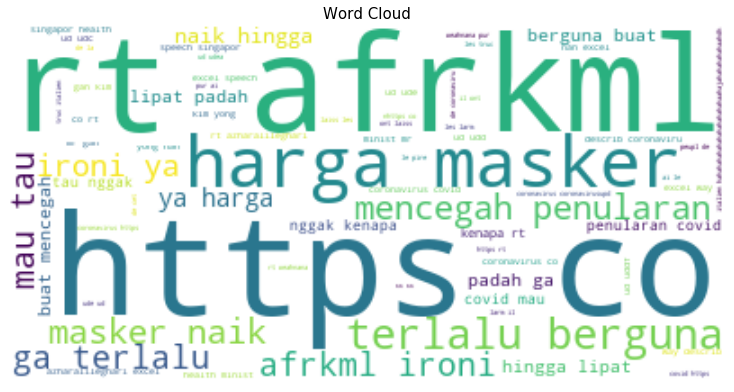

In [111]:
def wcv(clean):
    text_wc = " ".join(item for item in clean)
    wordcloud = WordCloud(background_color="white").generate(text_wc)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title('Word Cloud')
    plt.show() 
wcv(clean)

The word cloud showing here does not contain many words related to covid-19 except maybe the masker, covid. And the ones with larger portion are not necessary words but others such as phrases from webpage address. Therefore, further cleaning are required. 

# Most common words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Drexel-Bartoli\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


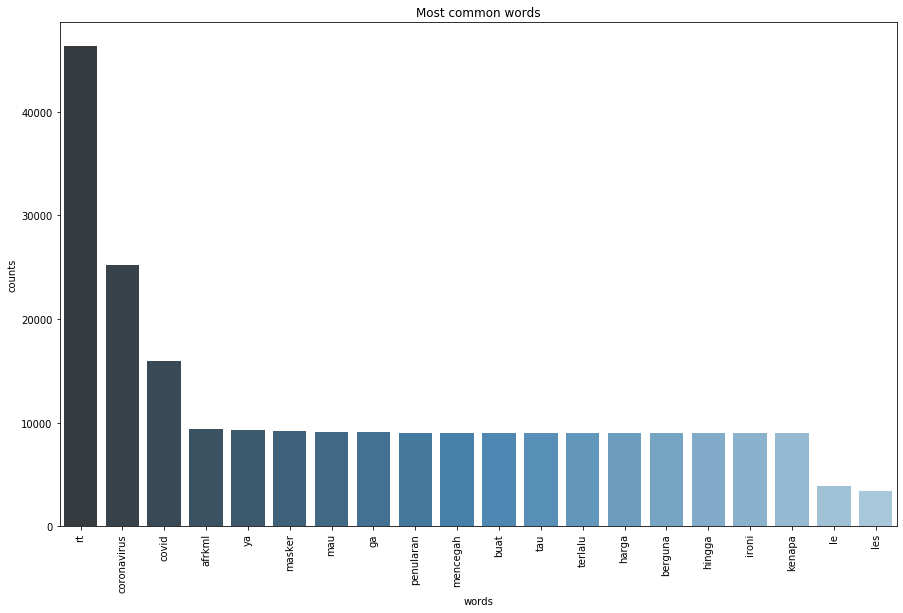

In [92]:
nltk.download('averaged_perceptron_tagger')

def plot_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='Most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette="Blues_d")
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Stop words for most common
stopwords_common = nltk.corpus.stopwords.words('english')
newStopWords = ['im','amp','https','http','co','time','year','day']
stopwords_common.extend(newStopWords)

# Pick out all the nouns
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)
train_part['clean'] = clean
data_nouns = pd.DataFrame(train_part.clean.apply(nouns))

cvn = CountVectorizer(stop_words=stopwords_common)
data_cvn = cvn.fit_transform(data_nouns.clean)
plot_most_common_words(data_cvn, cvn)

20 most common words are plotted above. It can be seen that (coronavirus, covid, masker in the top) these words are most likely related to the covid-19. Also there're some abbrevation such as 'rt' existed as oral languages). To make it meaningful, by observation, a fre more words are added to the stop words and the above cleaning procedures are repeated.

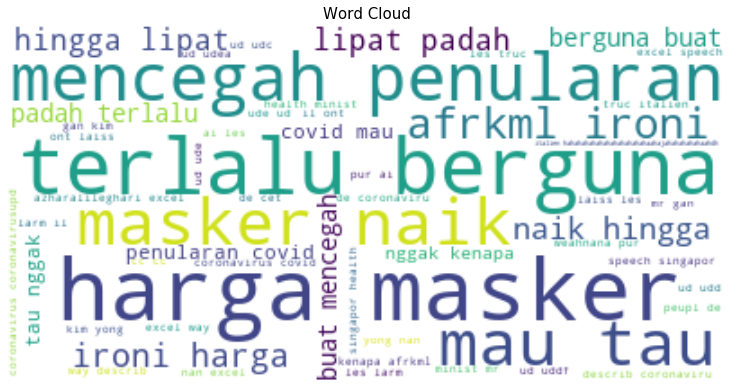

In [114]:
#Update Stop words
newStopWords = ['rt','ya','ga','le','la','mr']
stopwords_common.extend(newStopWords)
stop_words=stopwords_common;
round2 = lambda x: fix_Text(x)
clean= train_part.text.apply(round2)
wcv(clean)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


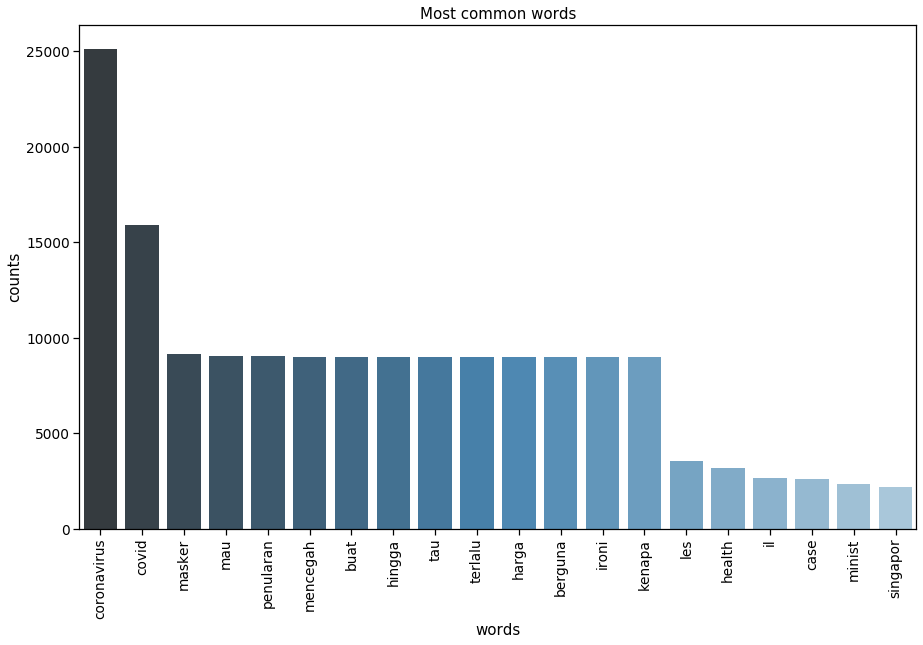

In [116]:
newStopWords = ['rt','ya','ga','le','la','mr']
stop_words.extend(newStopWords)
round2 = lambda x: fix_Text(x)
clean= train_part.text.apply(round2)

train_part['clean'] = clean
data_nouns = pd.DataFrame(train_part.clean.apply(nouns))
cvn = CountVectorizer(stop_words=stopwords_common)
data_cvn = cvn.fit_transform(data_nouns.clean)
plot_most_common_words(data_cvn, cvn)

# Term Frequency-Inverse Document Frequency

Converts text documents into a Document-Term Matrix (DTM) 
Use Term Frequency-Inverse Document Frequency (tf-idf) tocapture term importance.

In [97]:
tfidfVec=TfidfVectorizer(min_df=1000) # at least 100 occurences
tfidfdtm = tfidfVec.fit_transform(clean)
# reconstruct the dataset and dispalying the first five rows
tfidf_df = pd.DataFrame(tfidfdtm.toarray(), columns=tfidfVec.get_feature_names())
tfidf_df.head()

,afrkml,ai,azharalileghari,berguna,buat,case,cdc,china,co,confirm,...,uddf,ude,un,us,use,virus,way,wuhan,ya,yong
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.434614,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.222087,0.0,0.0,0.225089,0.225071,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222555,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.424223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.664328,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Summary
The NLP datasets was first visualized with exploratory data analysis to get a comprehensive understanding of the data itself. Then processed with tokenization, text cleaning using extended stops words as well as remove the websites,  TfidfVectorizer and tf-idf to construct the words to features. For any text dataset, the above approach  is essential to the success of any following applications, such as trend analyses, political preference predictions, etc.   
With the approach properly developed, it can help to monitor the instaneously infomation for theoretically unlimited number of topics onlinely. For the covid-19 shown in htis project, the analysis here also provides non-official updates. 